In [18]:
import numpy as np

import bayes_hysteresis
import hysteresis
import synthetic
import torch
import matplotlib.pyplot as plt
from bayes_hysteresis_correlated import CorrelatedBayesianHysteresis
from pyro.infer.autoguide import AutoMultivariateNormal
from pyro.infer import SVI, TraceEnum_ELBO, Predictive, Trace_ELBO
import pyro
from bayesian_utils import train, predict
import utils
from data_imports import get_synthetic


In [19]:
n_grid = 25

# %%
models = []
sums = []
means = []
guides = []
for state in [True, False]:
    h, m, hyst_model = get_synthetic(n_grid)
    train_h = h[:10]
    train_m = m[:10]
    hyst_model.set_data(train_h)
    model = CorrelatedBayesianHysteresis(hyst_model,
                                         n_grid,
                                         0.001,
                                         use_prior=state)

    guide = AutoMultivariateNormal(model)
    train(train_h, train_m, model, guide, 10000, 0.001)

    models += [model]
    guides += [guide]

calculating states
calculating states
calculating states
calculating states
[iteration 0001] loss: 7587.5948
[iteration 0101] loss: 16463.9337
[iteration 0201] loss: 6480.0826
[iteration 0301] loss: 6944.6154
[iteration 0401] loss: 32514.3293
[iteration 0501] loss: 16122.7712
[iteration 0601] loss: 6250.7897
[iteration 0701] loss: 6646.2969
[iteration 0801] loss: 31458.7038
[iteration 0901] loss: 25042.3469
[iteration 1001] loss: 7081.9952
[iteration 1101] loss: 7388.5082
[iteration 1201] loss: 6821.1085
[iteration 1301] loss: 8645.6551
[iteration 1401] loss: 21278.5255
[iteration 1501] loss: 11042.7759
[iteration 1601] loss: 25660.0523
[iteration 1701] loss: 7651.3034
[iteration 1801] loss: 6077.6869
[iteration 1901] loss: 36940.3094
[iteration 2001] loss: 7860.2099
[iteration 2101] loss: 6607.1816
[iteration 2201] loss: 6290.9896
[iteration 2301] loss: 14604.8099
[iteration 2401] loss: 9124.8189
[iteration 2501] loss: 9524.6098
[iteration 2601] loss: 8201.3176
[iteration 2701] loss: 

torch.Size([325])


C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_7400/3302666995.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(xx, yy, mean)
C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_7400/3302666995.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(xx, yy, std)


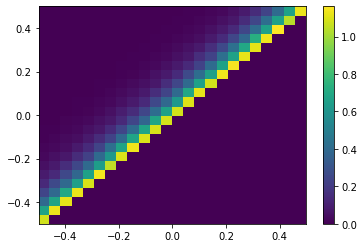

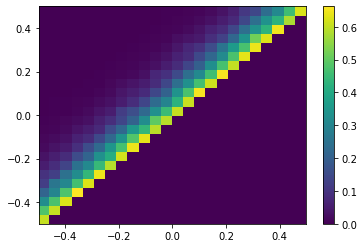

In [20]:
xx, yy = models[0].hysteresis_model.get_mesh()
test_h = torch.linspace(-1, 1, 50)

# look at priors
prior_dist = models[0].get_prior_density_distribution()
p_samples = torch.nn.Softplus()(prior_dist.sample([500]))
mean = torch.mean(p_samples, 0)
std = torch.std(p_samples, 0)
print(mean.shape)
mean = utils.vector_to_tril(mean, n_grid)
std = utils.vector_to_tril(std, n_grid)

fig, ax = plt.subplots()
c = ax.pcolor(xx, yy, mean)
fig.colorbar(c)

fig, ax = plt.subplots()
c = ax.pcolor(xx, yy, std)
fig.colorbar(c)

calculating states


C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_7400/2872079669.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(xx, yy, den.detach(), vmin=0, vmax=1.5)


calculating states


C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_7400/2872079669.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(xx, yy, den.detach(), vmin=0, vmax=1.5)


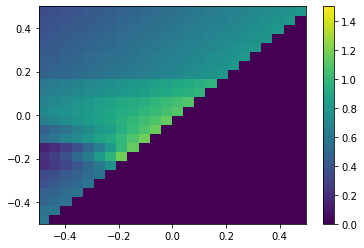

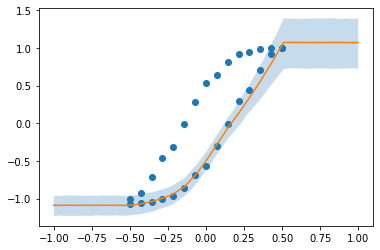

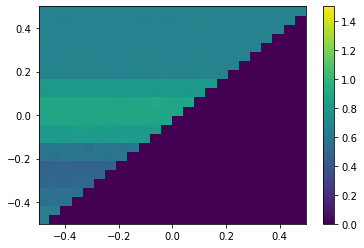

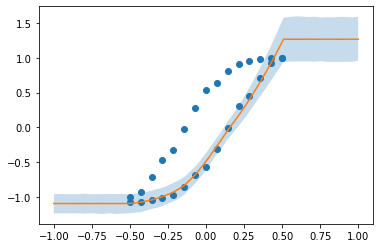

In [21]:
for i in [0, 1]:
    summary, samples = predict(test_h, models[i], guides[i])
    den = utils.vector_to_tril(
        torch.nn.Softplus()(summary['density']['mean'].flatten()), n_grid)
    fig, ax = plt.subplots()
    c = ax.pcolor(xx, yy, den.detach(), vmin=0, vmax=1.5)
    fig.colorbar(c)

    fig2,ax2 = plt.subplots()
    y = summary['obs']
    ax2.plot(h, m.detach(), 'o')
    ax2.plot(test_h, y['mean'].detach())
    ax2.fill_between(test_h,
                    y['5%'],
                    y['95%'],
                    alpha=0.25)

In [22]:
#for name, item in pyro.get_param_store().items():
#    print(f'{name}:{item}')

out = model(test_h)
print(out)

tensor([-2.2770, -2.2770, -2.2770, -2.2770, -2.2770, -2.2770, -2.2770, -2.2770,
        -2.2770, -2.2770, -2.2770, -2.2770, -2.2770, -2.2746, -2.2491, -2.2175,
        -2.1644, -2.1222, -2.0709, -1.9941, -1.8989, -1.8203, -1.7629, -1.6496,
        -1.5520, -1.3397, -1.2164, -1.0428, -0.8044, -0.6049, -0.3898, -0.1006,
         0.0678,  0.2937,  0.5102,  0.7283,  0.9679,  1.2197,  1.2197,  1.2197,
         1.2197,  1.2197,  1.2197,  1.2197,  1.2197,  1.2197,  1.2197,  1.2197,
         1.2197,  1.2197])


ValueError: operands could not be broadcast together with shapes (30,) (50,) 

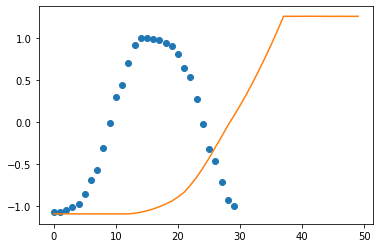

In [23]:
loc = pyro.param('AutoMultivariateNormal.loc')[:-2].double()
raw_den = utils.vector_to_tril(loc, n_grid)
den = utils.vector_to_tril(torch.nn.Softplus()(loc),
                           n_grid)

y = summary['obs']
fig, ax = plt.subplots()
ax.plot(m.detach(), 'o')
ax.plot(y['mean'].detach())
ax.fill_between(range(len(h)),
                 y['5%'],
                 y['95%'],
                 alpha=0.25)

fig, ax = plt.subplots()
ax.plot(h, m.detach(), 'o')

fig, ax = plt.subplots()
c = ax.pcolor(xx, yy, den.detach())
fig.colorbar(c)

fig, ax = plt.subplots()
c = ax.pcolor(xx, yy, raw_den.detach())
fig.colorbar(c)